In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('/Users/konansul/Desktop/course-ml/DATA/iris.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

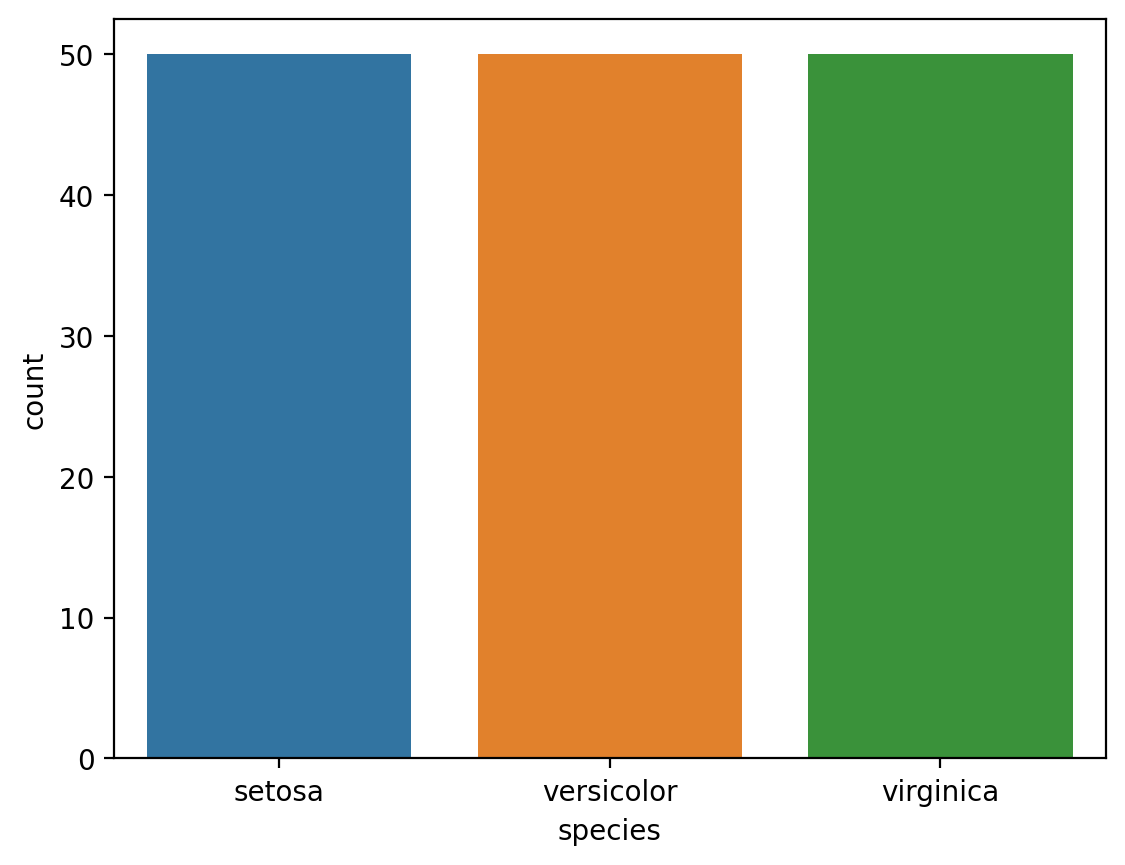

In [7]:
sns.countplot(x = 'species', data = data, hue = 'species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

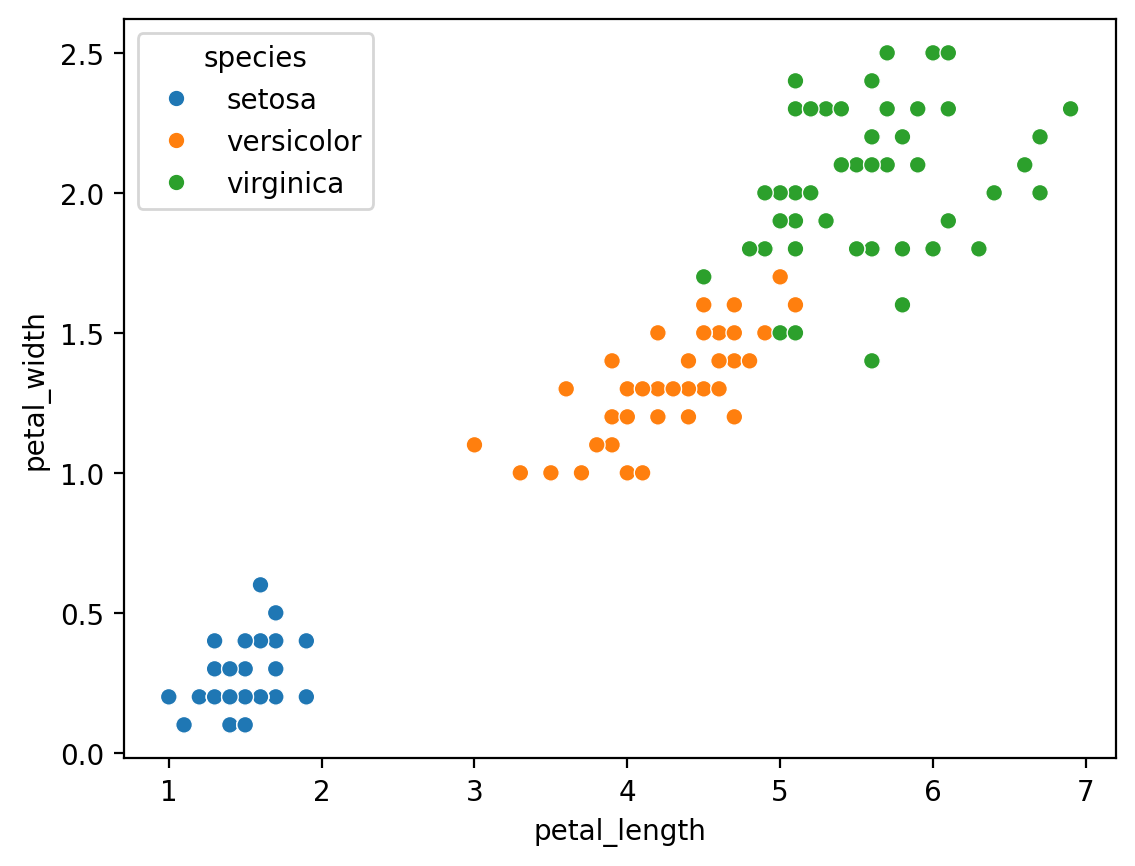

In [9]:
sns.scatterplot(x = 'petal_length', y =	'petal_width', data = data, hue = 'species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

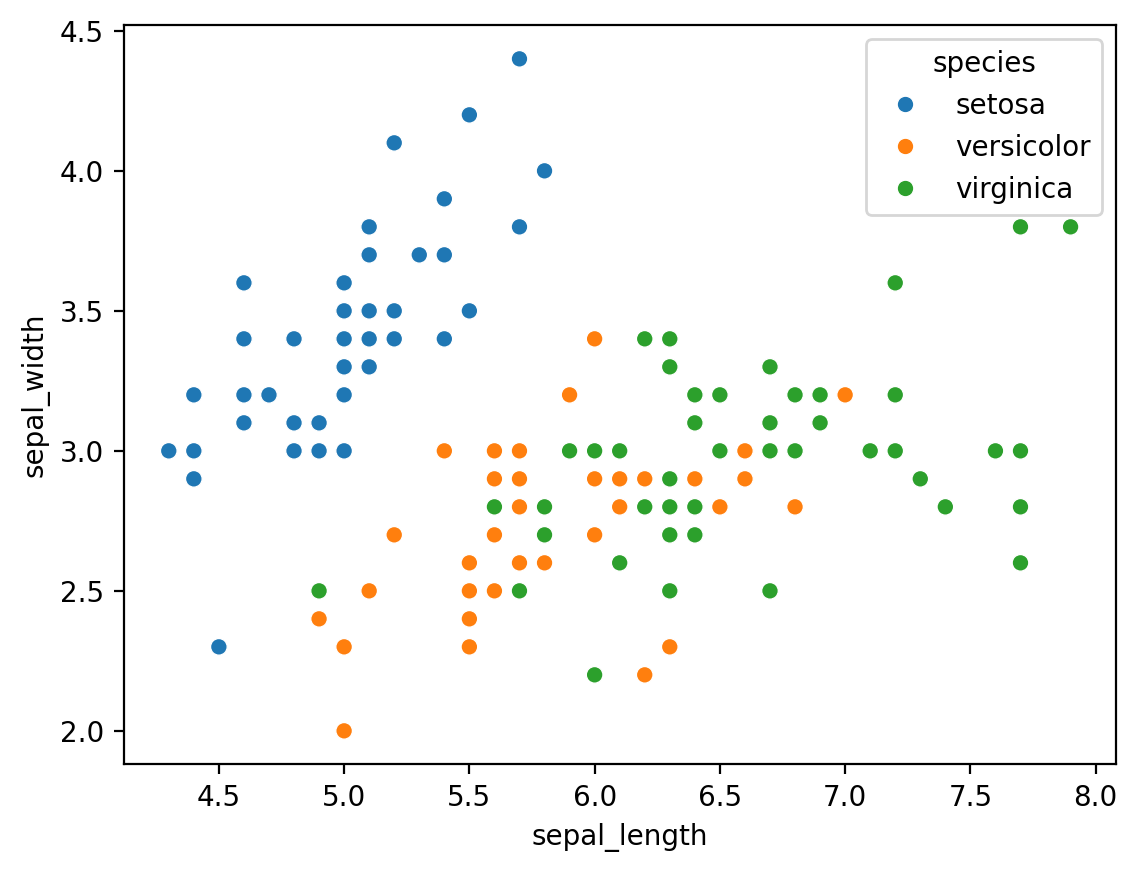

In [10]:
sns.scatterplot(x = 'sepal_length', y =	'sepal_width', data = data, hue = 'species')

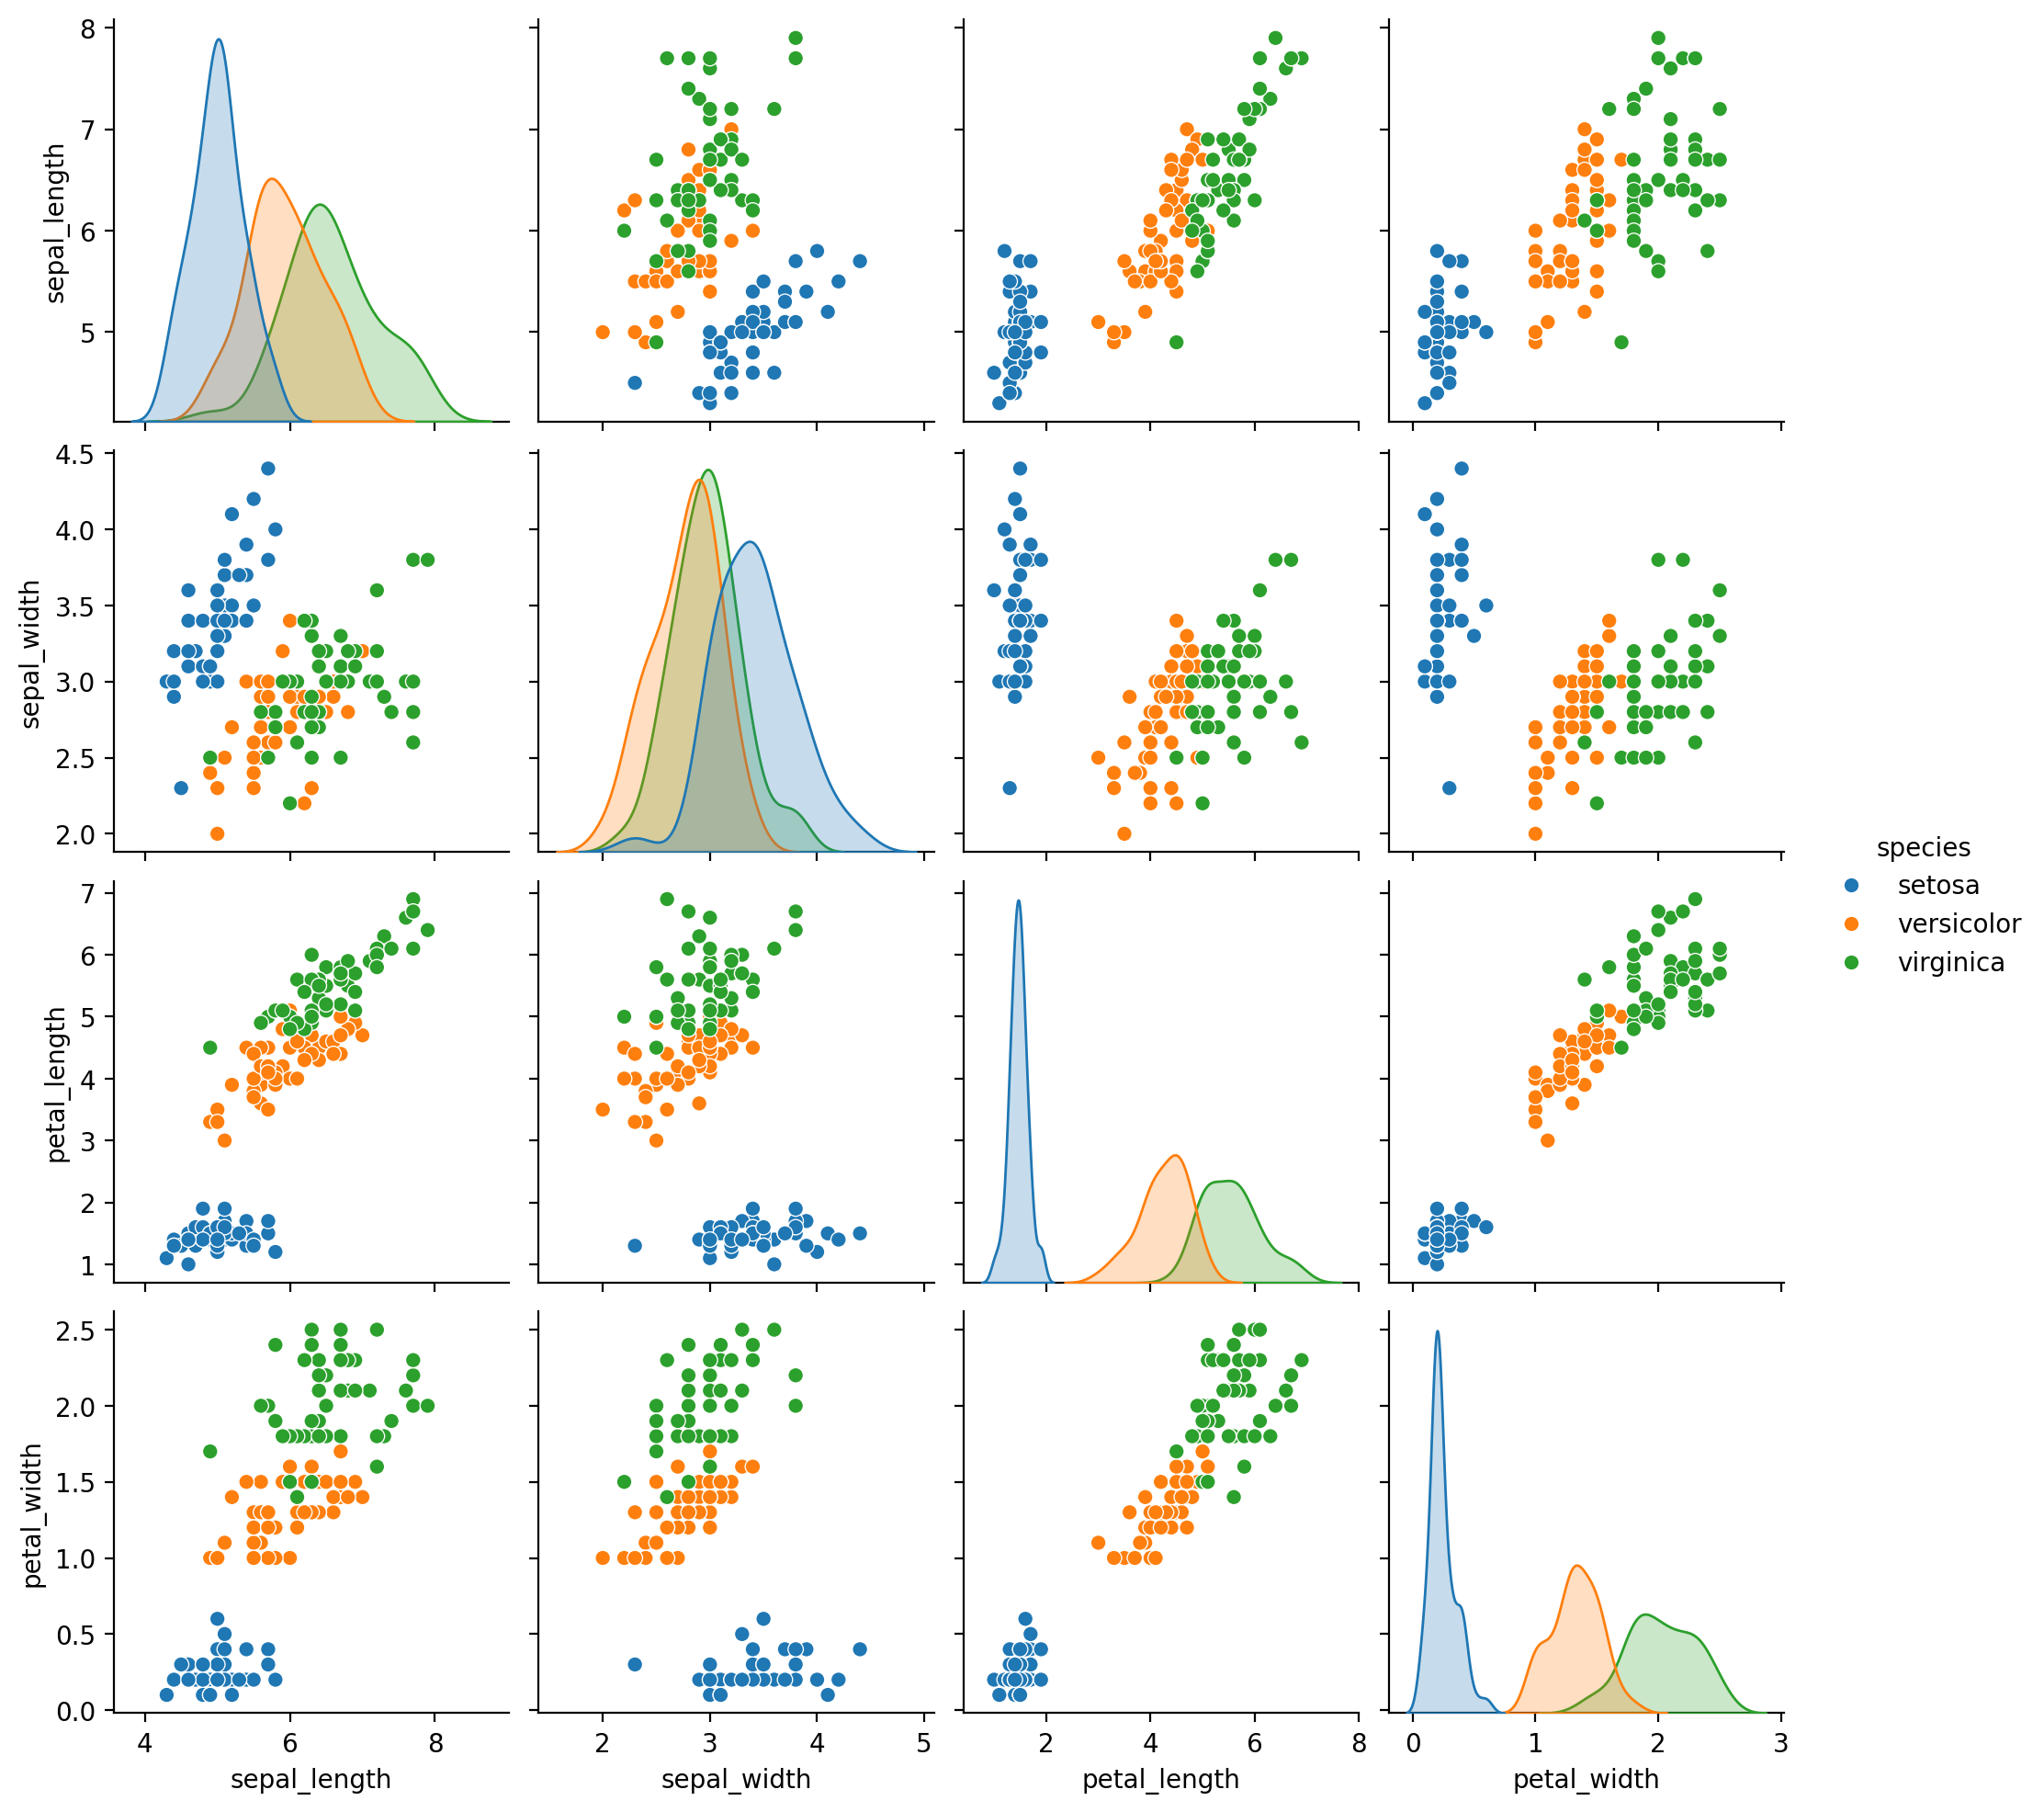

In [11]:
sns.pairplot(data, hue = 'species')

<Axes: >

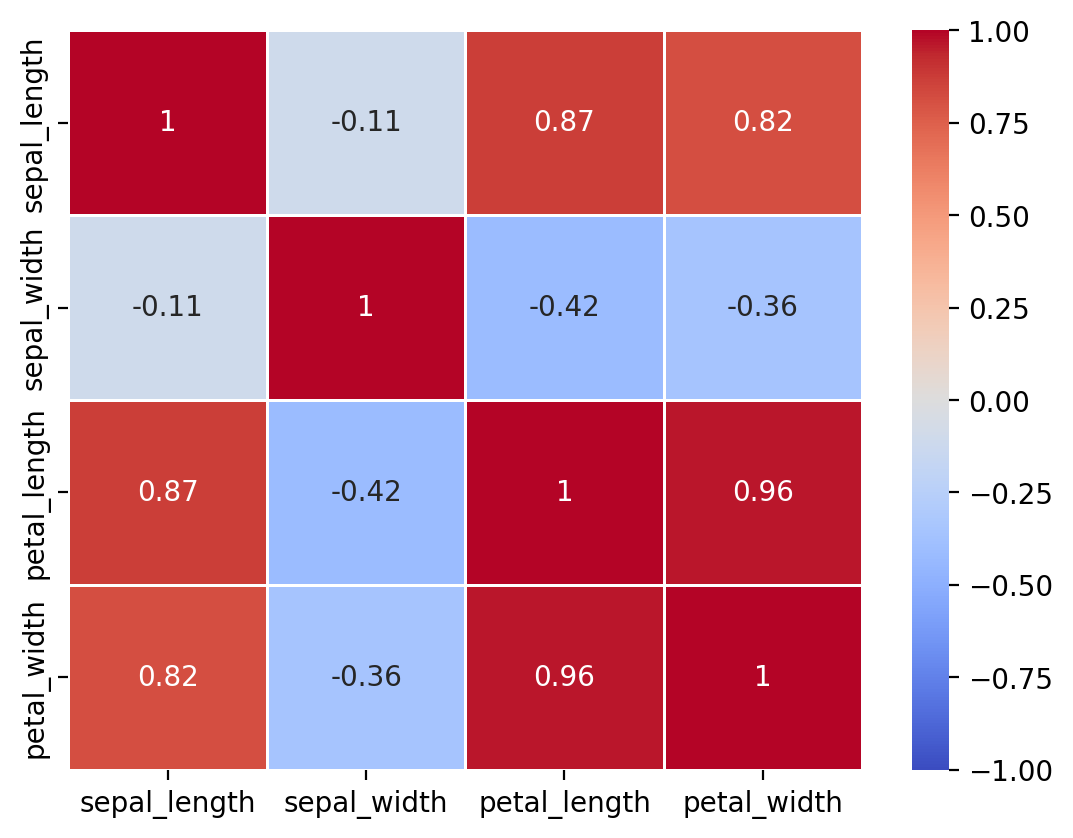

In [14]:
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'coolwarm', linewidths = 0.5, vmin = -1, vmax = 1)

In [17]:
X = data.drop('species', axis = 1)

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = data['species']

In [20]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [24]:
scaler = StandardScaler()

In [26]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [28]:
scaled_x_train

array([[-0.27551708, -0.92351554,  0.25484818,  0.13201286],
       [ 2.17908963, -0.20522568,  1.29977484,  1.38501624],
       [-0.85994725,  1.47078401, -1.23004759, -0.99569019],
       [-1.44437742,  1.23135406, -1.50502829, -1.24629086],
       [-1.32749138,  0.27363424, -1.17505145, -1.24629086],
       [ 1.01022929, -0.20522568,  0.6948173 ,  0.63321421],
       [-0.27551708, -0.20522568,  0.4198366 ,  0.38261353],
       [-1.79503552, -0.20522568, -1.45003215, -1.3715912 ],
       [ 1.47777343, -0.20522568,  1.18978256,  1.13441556],
       [-0.04174501, -0.92351554,  0.19985204, -0.24388816],
       [-1.09371932,  0.03420428, -1.23004759, -1.3715912 ],
       [-0.85994725, -1.40237546, -0.40510549, -0.11858782],
       [-0.27551708, -1.40237546,  0.08985976, -0.11858782],
       [-0.85994725,  0.51306419, -1.12005531, -0.87038985],
       [-0.04174501, -0.92351554,  0.74981344,  0.88381488],
       [-0.97683328,  1.23135406, -1.28504373, -1.24629086],
       [-1.09371932, -1.

In [38]:
model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 5000)

In [42]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

parameter_grid = {'penalty': penalty,
                  'l1_ratio' : l1_ratio,
                 'C':C}

In [43]:
grid_model = GridSearchCV(model, param_grid = parameter_grid)

In [44]:
grid_model.fit(scaled_x_train, y_train)

/Users/konansul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1213: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/konansul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/konansul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1213: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/konansul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid t

,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': array([1.0000...00000000e+10]), 'l1_ratio': array([0. ..., 1. ]), 'penalty': ['l1', 'l2', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [46]:
grid_model.best_params_

{'C': np.float64(11.28837891684689),
 'l1_ratio': np.float64(0.0),
 'penalty': 'l1'}

In [47]:
y_pred = grid_model.predict(scaled_x_test)

In [48]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [50]:
accuracy_score(y_test, y_pred)

0.9736842105263158

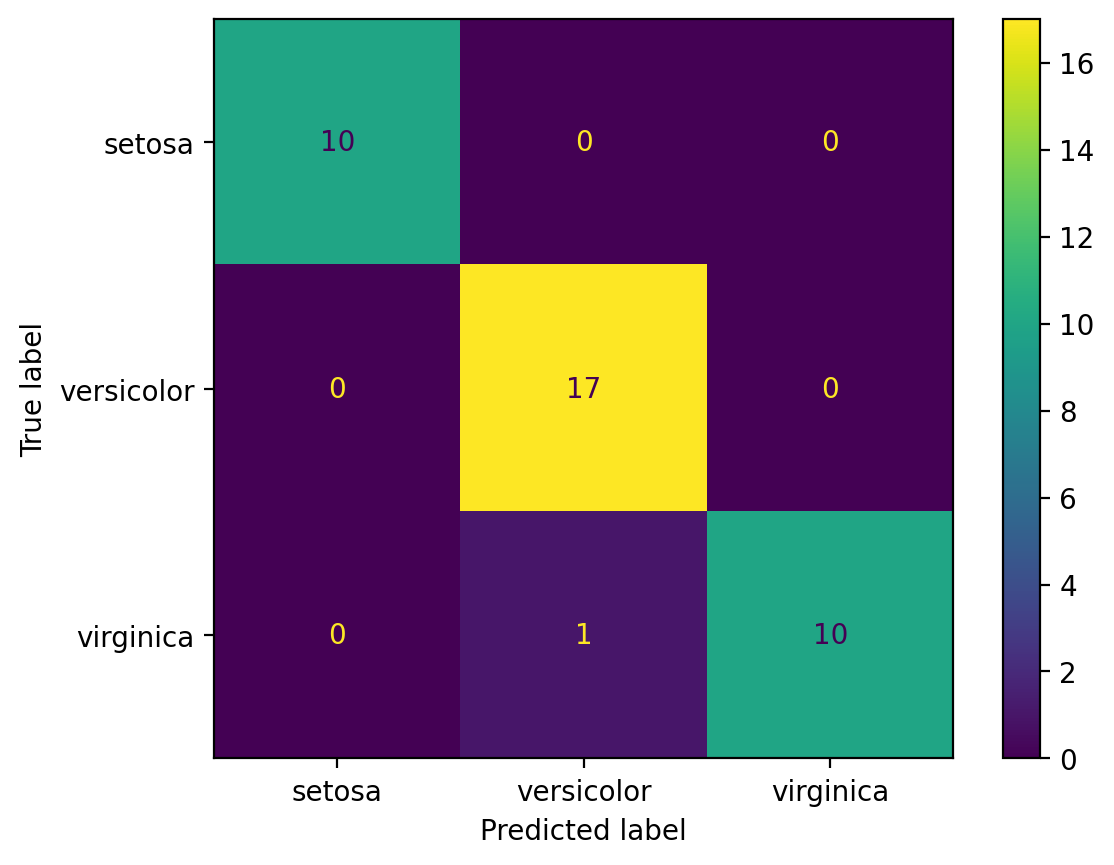

In [53]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_x_test, y_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [55]:
RocCurveDisplay.from_estimator(grid_model, scaled_x_test, y_test)

ValueError: Expected 'estimator' to be a binary classifier. Got 3 classes instead.